In [13]:
'''import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor'''
import pandas as pd
import numpy as np
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('income_classification.csv')

In [3]:
df.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape


(32561, 15)

In [5]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [15]:
a = [' workclass', ' education', ' marital-status', ' occupation',' relationship',' race',' sex',' native-country',' income']
for i in a:
    df[i] = df[i].astype('|S')
    df[i] = label_encoder.fit_transform(df[i])
df 

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32557,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32558,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32559,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [16]:
variables = df[['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

vif

,VIF,Features
0,8.521265,age
1,8.475260,workclass
2,4.031573,fnlwgt
3,9.210325,education
4,18.379729,education-num
5,3.976179,marital-status
6,3.710596,occupation
7,2.612286,relationship
8,17.578379,race
9,4.441675,sex


In [17]:
df = df.drop([' education-num',' race',' hours-per-week',' native-country'], axis=1)
df

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,sex,capital-gain,capital-loss,income
0,39,7,77516,9,4,1,1,1,2174,0,0
1,50,6,83311,9,2,4,0,1,0,0,0
2,38,4,215646,11,0,6,1,1,0,0,0
3,53,4,234721,1,2,6,0,1,0,0,0
4,28,4,338409,9,2,10,5,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,2,13,5,0,0,0,0
32557,40,4,154374,11,2,7,0,1,0,0,1
32558,58,4,151910,11,6,1,4,0,0,0,0
32559,22,4,201490,11,4,1,3,1,0,0,0


In [18]:
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
df

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,sex,capital-gain,capital-loss,income
0,39,7,77516,9,4,1,1,1,2174,0,0
1,50,6,83311,9,2,4,0,1,0,0,0
2,38,4,215646,11,0,6,1,1,0,0,0
3,53,4,234721,1,2,6,0,1,0,0,0
4,28,4,338409,9,2,10,5,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,2,13,5,0,0,0,0
32557,40,4,154374,11,2,7,0,1,0,0,1
32558,58,4,151910,11,6,1,4,0,0,0,0
32559,22,4,201490,11,4,1,3,1,0,0,0


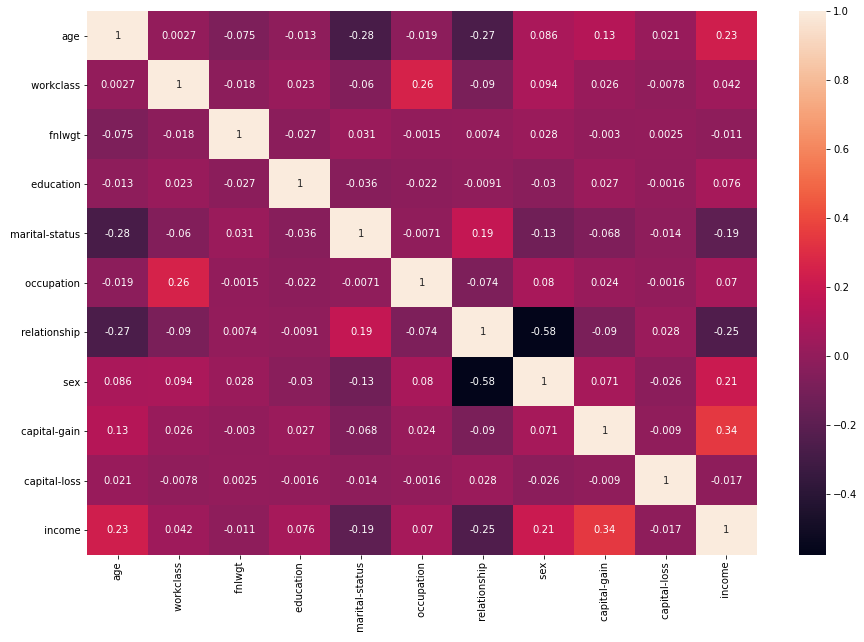

In [21]:
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr , annot=True)

In [22]:
data = df.values
X,y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [23]:
model = RandomForestClassifier(n_estimators = 50, random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=0)

In [25]:
y_pred = model.predict(X_test)

In [26]:
roc_auc_score(y_test, y_pred)

0.7531545608108108